In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import time
import random
import pandas as pd
from array import *

from scipy import signal
from scipy import misc
from scipy.spatial import distance
from skimage import measure
from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon

In [2]:
def random_color():
    levels = range(32,256,32)
    return tuple(random.choice(levels) for _ in range(3))

def show_image(img):
    figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()

In [3]:
img = []
img4 = []
img_orig = []

### Load image

##### Insert white border around image

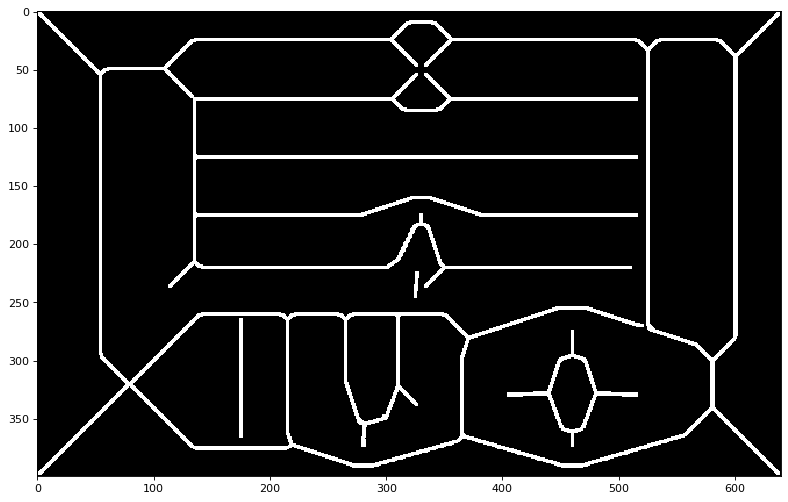

In [4]:
img = cv2.imread("mapout.png", cv2.IMREAD_GRAYSCALE);
backtorgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB);
img = backtorgb.dot([0.33,0.33,0.33])

(my,mx)=img.shape
img[0,:]=255
img[:,0]=255
img[my-1,:]=255
img[:,mx-1]=255

img_orig = img.copy()

image_data = np.stack((backtorgb[:,:,0],backtorgb[:,:,1],backtorgb[:,:,2]), axis=2)
show_image(image_data)

In [22]:
gray = cv2.cvtColor(image_data, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst2 = cv2.cornerHarris(gray,5,3,0.04)

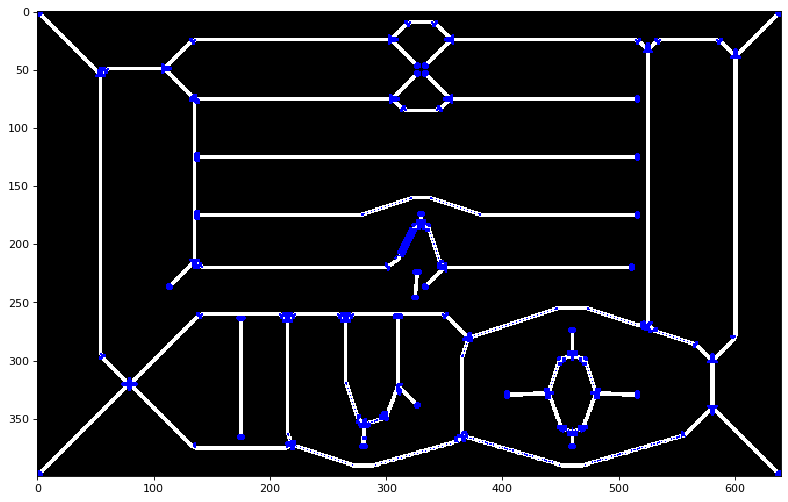

In [6]:
ret, dst = cv2.threshold(dst2,0.025*dst2.max(),255,0)
dst = np.uint8(dst)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
image_data[dst>0.1*dst.max()]=[0,0,255]
show_image(image_data)

In [ ]:
plotLine(x0,y0, x1,y1)
    dx = x1 - x0
    dy = y1 - y0
    D = 2*dy - dx
    y = y0

    for x from x0 to x1
        plot(x,y)
        if D > 0
               y = y + 1
               D = D - 2*dx
        end if
        D = D + 2*dy

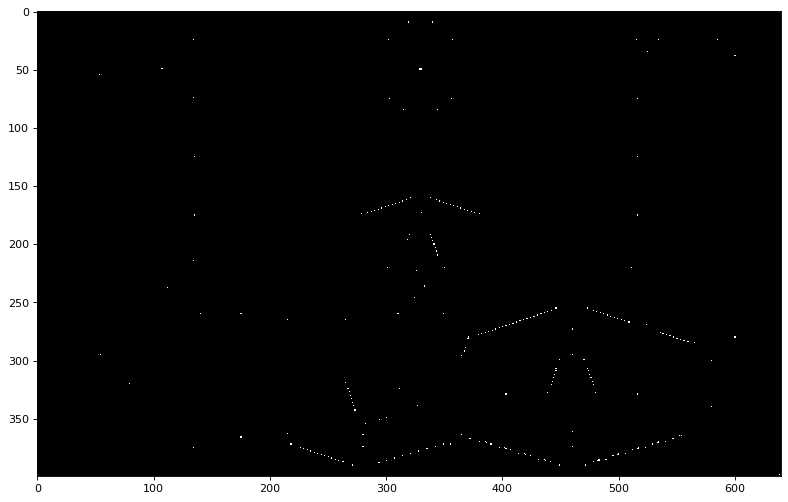

In [29]:
blank = np.zeros_like(gray)
for i in corners:
    [x,y] = i
    x=int(x)
    y=int(y)
    
    blank[y,x]=255

show_image(blank)

In [30]:
len(corners)

270